In [8]:
# 로지스틱 회귀: target은 0/1의 수치여야 계산 가능

# 데이터 불러오기
import pandas as pd
df = pd.read_csv('data/Fish.csv')
cond = df['Species'].isin(['Bream', 'Smelt'])
data = df[cond].drop(columns='Species') # species만 삭제한 data 구조 만들기
target = df.loc[cond, 'Species'].map({'Bream': 0, 'Smelt': 1})
    # 선형 회귀는 target이 수치 값이어야 계산 가능 -> string 범주형이면X

# 셋 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target)

# 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input, train_target)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# 학습
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
lr.score(test_scaled, test_target)

1.0

In [9]:
lr.predict(train_scaled[:5])
lr.predict_proba(train_scaled[:5]).round(3)

array([[0.991, 0.009],
       [0.999, 0.001],
       [0.992, 0.008],
       [0.944, 0.056],
       [0.999, 0.001]])

In [26]:
# 로지스틱: 다중 분류: 7마리 생선 모두 맞추기

# 데이터 불러오기
import pandas as pd
df = pd.read_csv('data/Fish.csv')
data = df.drop(columns='Species')
target = df[['Species']]

# 셋 구분
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target)

# 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input, train_target)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

#학습1: 로지스틱_다중분류
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(test_scaled, test_target))

# 학습2: 확률적 경사 하강법(SGD) -> 성능 더 좋음
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier()
sc.fit(train_scaled, train_target)
print(sc.score(test_scaled, test_target))

0.775
0.75


C:\Users\1-08\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\1-08\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
# 하이퍼 파리미터 튜닝 적용한 경우
from sklearn.model_selection import GridSearchCV
parms = {'max_iter': range(1000, 5000, 500)}
gs = GridSearchCV(lr, parms)
gs.fit(train_scaled, train_target)
print(gs.score(test_scaled, test_target))
gs.best_estimator_

C:\Users\1-08\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\1-08\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\1-08\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\1-08\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

0.775


C:\Users\1-08\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\1-08\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\1-08\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\1-08\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

LogisticRegression(max_iter=1000)

In [66]:
# 결정 트리 알고리즘

# 데이터 불러오기
df = pd.read_csv('data/tree_data.csv')
data = df.drop(columns=['ID', 'Heart_Disease'])
target = df['Heart_Disease']

# 셋 구성
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, stratify=target, random_state=42)

# # 정규화
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# ss.fit(train_input) # 타겟 없이 입력 데이터만 정규화
# train_scaled = ss.transform(train_input)
# test_scaled = ss.transform(test_input)

# 결정 트리
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)

1.0
0.5


ValueError: Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=3.

In [127]:
# 결정 트리

import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

data = wine[['alcohol', 'sugar', 'pH']]
target = wine['class']

# 셋 구분
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target)

# 결정 트리
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

# 하이퍼 파라미터 찾기
from sklearn.model_selection import GridSearchCV
parms = {'max_depth': range(1, 20, 1),
        'min_impurity_decrease': [0.1, 0.01, 0.001, 0.0001, 0.00001]}
gs = GridSearchCV(dt, parms)
gs.fit(train_input, train_target)
best_dt = gs.best_estimator_

# 교차 검증하기
from sklearn.model_selection import cross_validate
scores = cross_validate(best_dt, train_input, train_target)
print('교차 검증 정확도:', scores['test_score'].mean())

# 검증 완료했으니, 최적 모델 학습
best_dt.fit(train_input, train_target)
print('훈련 정확도:', best_dt.score(train_input, train_target))
print('테스트 정확도:', best_dt.score(test_input, test_target))

# 새 정보 예측하기
new_wine = pd.DataFrame([[5, 1, 10]], columns=['alcohol', 'sugar', 'pH'])
prediction = best_dt.predict(new_wine)
if prediction[0]==1:
    print('화이트 와인입니다.')
else:
    print('레드 와인입니다.')

교차 검증 정확도: 0.86843173800874
훈련 정확도: 0.9068144499178982
테스트 정확도: 0.8473846153846154
화이트 와인입니다.


In [179]:
# 선형회귀 + 릿지 회귀

# 데이터 불러오기
import pandas as pd
df = pd.read_csv('data/Fish.csv')
cond = df['Species'].isin(['Bream', 'Smelt'])
data = df[cond].drop(columns='Species')
target = df.loc[cond, 'Species'].map({'Bream': 0, 'Smelt': 1})

# 셋 구분
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target)

# 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input, train_target)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# 릿지 모델
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9674206977904064
0.9737549071670648


In [180]:
df = pd.read_csv('data/my/Boston_house.csv')
df.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [197]:
# 선형회귀 + 로쏘 + 새 값 입력
# 이 중에서 <범죄율, 주택당 방 수, 인구 중 하위 계층 비율, 노후 주택 비율>과 <주택가격>과의 상관관계를 예측해보자.
# CRIM: 범죄율, RM: 주택당 방 수, LSTAT: 인구 중 하위 계층 비율, AGE: 1940년 이전에 건축된 주택의 비율, B: 인구 중 흑인 비율

# 데이터 불러오기
df = pd.read_csv('data/my/Boston_house.csv')
df.head()

data = df[['CRIM', 'RM', 'LSTAT', 'AGE']]
target = df[['Target']]

# 셋 구분
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target)

# 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input, train_target)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# 라쏘 선언
from sklearn.linear_model import Lasso
lasso = Lasso()

# 교차 검증
from sklearn.model_selection import cross_validate
scores = cross_validate(lasso, train_scaled, train_target)
print(scores['test_score'].mean())

# 라쏘 학습
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

prediction = lasso.predict(train_target)


# new_house = pd.DataFrame([[0.009, 9, 9, 90]], columns=['CRIM', 'RM', 'LSTAT', 'AGE'])
# prediction = lasso.predict(new_house)
# print(prediction)

0.5859172544577366
0.6199563243629043
0.6057331923323388


C:\Users\1-08\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


ValueError: X has 1 features, but Lasso is expecting 4 features as input.

ValueError: x and y must be the same size

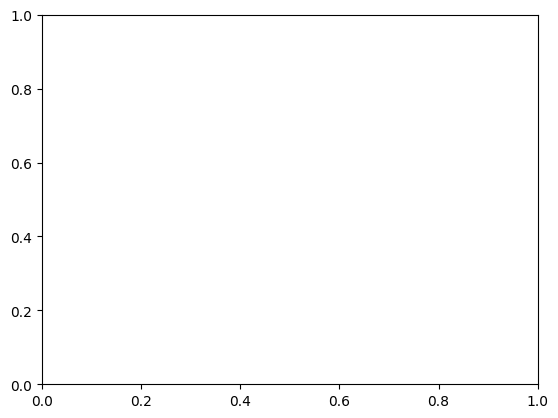

In [195]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(test_target, prediction, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("LINEAR REGRESSION")
plt.show()